In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def muraki_model(r, lamb, x):
    if lamb <= x:
        return 1 - r**lamb
    else:
        return (1 - r**x) * (r**(lamb - x))

In [3]:
al_n_values = np.linspace(1, 2, 2, dtype='int_')
ga_n_values = np.linspace(1, 2, 2, dtype='int_')
r_values = np.linspace(0.1, 0.6, 6)

In [4]:
print(al_n_values, r_values)

[1 2] [0.1 0.2 0.3 0.4 0.5 0.6]


In [5]:
percent = []
layers_num = al_n_values[1] + ga_n_values[1]
x = ga_n_values[1]
r = r_values[0]
for lamb in range(1, layers_num + 1):
    percent.append(muraki_model(r, lamb, x))

In [6]:
print(percent)

[0.9, 0.99, 0.099, 0.009900000000000003]


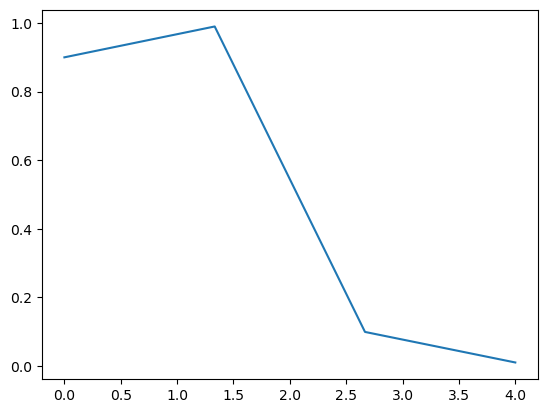

In [7]:
plt.plot(np.linspace(0, layers_num, layers_num), percent)

In [8]:
TEMPL = '<layer mixfraction="{}"/>'

In [9]:
templs = {}

for al_n_num in al_n_values:
    for ga_n_num in ga_n_values:
        for r in r_values:
            cur_templs = []
            layers_num = al_n_num + ga_n_num
            x = al_n_num
            for lamb in range(1, layers_num + 1):
                percent = muraki_model(r, lamb, x)
                cur_templs.append(TEMPL.format(percent))
            key = f"{al_n_num}_{ga_n_num}_{r:.2f}"
            templs[key] = (cur_templs)
            
            


In [10]:
print(templs)

{'1_1_0.10': ['<layer mixfraction="0.9"/>', '<layer mixfraction="0.09000000000000001"/>'], '1_1_0.20': ['<layer mixfraction="0.8"/>', '<layer mixfraction="0.16000000000000003"/>'], '1_1_0.30': ['<layer mixfraction="0.7"/>', '<layer mixfraction="0.21000000000000002"/>'], '1_1_0.40': ['<layer mixfraction="0.6"/>', '<layer mixfraction="0.24"/>'], '1_1_0.50': ['<layer mixfraction="0.5"/>', '<layer mixfraction="0.25"/>'], '1_1_0.60': ['<layer mixfraction="0.4"/>', '<layer mixfraction="0.24"/>'], '1_2_0.10': ['<layer mixfraction="0.9"/>', '<layer mixfraction="0.09000000000000001"/>', '<layer mixfraction="0.009000000000000003"/>'], '1_2_0.20': ['<layer mixfraction="0.8"/>', '<layer mixfraction="0.16000000000000003"/>', '<layer mixfraction="0.03200000000000001"/>'], '1_2_0.30': ['<layer mixfraction="0.7"/>', '<layer mixfraction="0.21000000000000002"/>', '<layer mixfraction="0.06300000000000001"/>'], '1_2_0.40': ['<layer mixfraction="0.6"/>', '<layer mixfraction="0.24"/>', '<layer mixfraction="

## Генерация xml файлов для h5

In [24]:
tml_file = open('tml.xml')
tml_content = ''.join(tml_file.readlines())
tml_file.close()

for key, templ in templs.items():
    layers_part = '\n'.join(templ)
    cur_file = open(f"lattice_files/{key}.xml", 'w')
    cur_file.write(tml_content.format(layers_part))
    cur_file.close()

## Генерация h5 файлов

In [25]:
import os

files = os.listdir('lattice_files')

for file in files:
    ! superlattice_builder lattice_files/{file}

*********************************************
This is ALMA/superlattice_builder version 1.3
*********************************************
Loading crystal information for AlN_cubic
Loading crystal information for GaN_cubic
Superlattice UID: COCWFFQG
Average composition: 
AlN_cubic: 58.00%
GaN_cubic: 42.00%
Target filename: ./AlN_GaN/superlattice_AlN_cubic0.58_GaN_cubic0.42_COCWFFQG_24_24_24.h5
Building average virtual crystal
Number of q points: 13824
Number of inequivalent q points: 413
Performing three-phonon calculations
Computing scattering rates due to mass disorder
Computing scattering rates due to superlattice barriers
[------------------------------------------------------------------------>] 100%
Writing output file

[DONE.]
*********************************************
This is ALMA/superlattice_builder version 1.3
*********************************************
Loading crystal information for AlN_cubic
Loading crystal information for GaN_cubic
Superlattice UID: XCZL4AVP
Average 

In [6]:
import os
import tempfile
import numpy as np


h5_files = os.listdir("AlN_GaN")
sweep_file = open('sweep.xml')
sweep_templ = "".join(sweep_file.readlines())



In [4]:
print(sweep_templ.format(h5_files[0]))
print(h5_files[0][0:-12])

<crossplanefilmsweep>
    <H5repository root_directory="./"/>
    <compound directory="AlN_GaN" base="superlattice_AlN_cubic0.58_GaN_cubic0.42_COCWFFQG_24_24_24.h5" gridA="24" gridB="24" gridC="24"/>
    <sweep type="log" start="1e-9" stop="1e-4" points="51"/>
    <transportAxis x="0" y="0" z="1"/>
    <target directory="result" file="AUTO"/>
</crossplanefilmsweep>
superlattice_AlN_cubic0.58_GaN_cubic0.42_COCWFFQG
['superlattice_AlN_cubic0.58_GaN_cubic0.42_COCWFFQG_24_24_24.h5', 'superlattice_AlN_cubic0.3493_GaN_cubic0.6507_LZU3CQEL_24_24_24.h5', 'superlattice_AlN_cubic0.7083_GaN_cubic0.2917_F537QXMM_24_24_24.h5', 'superlattice_AlN_cubic0.3723_GaN_cubic0.6277_Q3Z4URZM_24_24_24.h5', 'superlattice_AlN_cubic0.408_GaN_cubic0.592_PMT4W6G5_24_24_24.h5', 'superlattice_AlN_cubic0.337_GaN_cubic0.663_ZLCRYH4M_24_24_24.h5', 'superlattice_AlN_cubic0.5469_GaN_cubic0.4531_L5BYNLQD_24_24_24.h5', 'superlattice_AlN_cubic0.68_GaN_cubic0.32_AJKBNV7J_24_24_24.h5', 'superlattice_AlN_cubic0.5253_GaN_cubic0.

In [ ]:
t_range = np.linspace(200, 500, 4, dtype=int)

for file in h5_files:
    tmp_file = tempfile.NamedTemporaryFile(prefix='sweep', suffix='.xml')
    with open(tmp_file.name, 'w') as f:
        f.write(sweep_templ.format(file[0:-12]))
    for t in t_range:
        ! kappa_crossplanefilms {f.name} {t}